
Cleaning folder: C:\Users\Tennie Mum\Desktop\repos\Plant-Disease-Detection\data\train
Broken removed in this folder: 0

Cleaning folder: C:\Users\Tennie Mum\Desktop\repos\Plant-Disease-Detection\data\valid
Broken removed in this folder: 0

Cleaning folder: C:\Users\Tennie Mum\Desktop\repos\Plant-Disease-Detection\data\test
Broken removed in this folder: 0

Train classes found: 38
Validation classes: 38
Test classes: 1
Saved manifest → data/procssd\train.csv  | Images: 70295
Saved manifest → data/procssd\val.csv  | Images: 17572
Saved manifest → data/procssd\test.csv  | Images: 33


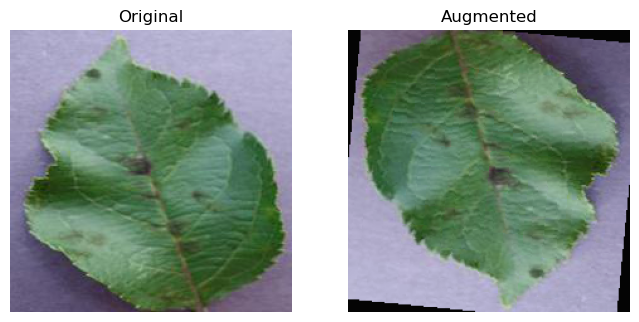

In [1]:

# IMPORTS

import os
import pandas as pd
from PIL import Image, UnidentifiedImageError, ImageEnhance
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# PATHS  AND DIRECTORIES

train_path = r"C:\Users\Tennie Mum\Desktop\repos\Plant-Disease-Detection\data\train"
val_path   = r"C:\Users\Tennie Mum\Desktop\repos\Plant-Disease-Detection\data\valid"
test_path  = r"C:\Users\Tennie Mum\Desktop\repos\Plant-Disease-Detection\data\test"

processed_path = "data/procssd"
os.makedirs(processed_path, exist_ok=True)

# CLEANING FUNCTION

def clean_images(folder_path):
    print(f"\nCleaning folder: {folder_path}")
    classes = os.listdir(folder_path)
    broken_count = 0

    for class_name in classes:
        class_folder = os.path.join(folder_path, class_name)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)

            try:
                img = Image.open(img_path)
                img.verify()  # check if corrupted

                # Re-open for processing
                img = Image.open(img_path)
                img = img.convert("RGB")
                img = img.resize((224, 224))
                img.save(img_path)

            except (UnidentifiedImageError, OSError):
                print("Broken image removed:", img_path)
                broken_count += 1
                os.remove(img_path)

    print("Broken removed in this folder:", broken_count)
    return classes


# CLEAN TRAIN, VALID, AND TEST

train_classes = clean_images(train_path)
val_classes   = clean_images(val_path)
test_classes  = clean_images(test_path)

print("\nTrain classes found:", len(train_classes))
print("Validation classes:", len(val_classes))
print("Test classes:", len(test_classes))


# CREATE CSV MANIFESTS

def generate_manifest(folder_path, output_csv):
    filepaths = []
    labels = []

    classes = os.listdir(folder_path)
    for class_name in classes:
        class_folder = os.path.join(folder_path, class_name)
        for img_name in os.listdir(class_folder):
            filepaths.append(os.path.join(class_folder, img_name))
            labels.append(class_name)

    df = pd.DataFrame({"filepath": filepaths, "label": labels})
    df.to_csv(output_csv, index=False)
    print(f"Saved manifest → {output_csv}  | Images: {len(df)}")

# CSV outputs
generate_manifest(train_path, os.path.join(processed_path, "train.csv"))
generate_manifest(val_path, os.path.join(processed_path, "val.csv"))
generate_manifest(test_path, os.path.join(processed_path, "test.csv"))


# AUGMENTATION FUNCTION

def augment_image(img):
    # Random horizontal flip
    if random.random() > 0.5:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)

    # Random vertical flip
    if random.random() > 0.5:
        img = img.transpose(Image.FLIP_TOP_BOTTOM)

    # Random rotation (-15 to +15)
    img = img.rotate(random.uniform(-15, 15))

    # Brightness & contrast jitter
    img = ImageEnhance.Brightness(img).enhance(random.uniform(0.8, 1.2))
    img = ImageEnhance.Contrast(img).enhance(random.uniform(0.8, 1.2))

    return img


# SHOW SAMPLE AUGMENTATION

sample_img_path = os.listdir(os.path.join(train_path, train_classes[0]))[0]
sample_img = Image.open(os.path.join(train_path, train_classes[0], sample_img_path))
aug_img = augment_image(sample_img)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(sample_img); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(aug_img); plt.title("Augmented"); plt.axis("off")
plt.show()
